In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from PointTracking import PointTracker as pt
from classicalfield_orig import FiniteTempGPE as gpe

Total Imag Time:  1.364574670791626
kmax:  4.0212385965949355
T:  1.155025703624629
(241, 128, 128)
(1, 128, 128)


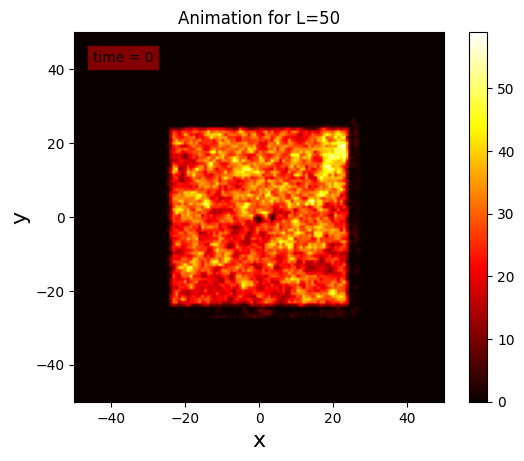

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 60000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'test.mp4', Tfact = 1/7, dst = False, vortex = True)

In [3]:
tracker = pt(g.snaps, g.dx, g.L) # initialize tracker object to track the vortices in each frame of snaps 

In [4]:
for point in tracker.points: 
    print(point.getCoors())

(27.734375, 24.609375)
(24.609375, 25.390625)


Text(0, 0.5, 'x')

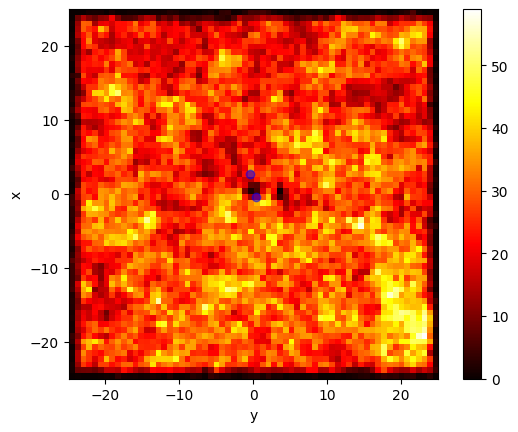

In [5]:
psi = g.snaps[0] 
L = g.L
dx = g.dx 
box = psi[int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
for point in tracker.points: 
    plt.scatter(point.getCoors()[1]-L/2,point.getCoors()[0]-L/2, color = 'blue', alpha = 0.5)
plt.xlabel('y')
plt.ylabel('x')


### Test the tracking when a new vortex is detected 

In [6]:
print(np.shape(g.snaps))
snap = 8

(241, 128, 128)


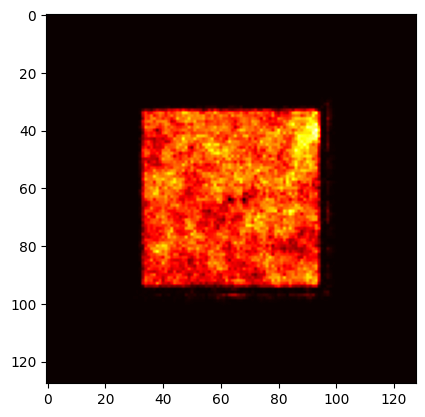

In [7]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap])**2, cmap = plt.cm.hot)
plt.show() 

In [8]:
for snapshot in g.snaps: 
    vortices, antivortices = pt.detectVortices(tracker, snapshot)
    if len(vortices) + len(antivortices) > 2: 
        print(snapshot) 
        break 

In [9]:
print(len(vortices) )
print(len(antivortices))

0
2


In [10]:
for i in range(len(g.snaps)): 
    vortices, antivortices = pt.detectVortices(tracker, g.snaps[i])
    if i%50 == 0: 
        
        print(i, " Vortices: ", vortices) 
        print(i, " AntiVortices: ", antivortices) 
    if len(vortices) + len(antivortices) > 2: 
        print("More vortices") 
    elif len(vortices) + len(antivortices) < 2: 
        print(i, " fewer vortices")

0  Vortices:  []
0  AntiVortices:  [[27.734375 24.609375]
 [24.609375 25.390625]]
50  Vortices:  []
50  AntiVortices:  [[24.609375 24.609375]
 [28.515625 25.390625]]
100  Vortices:  []
100  AntiVortices:  [[23.828125 24.609375]
 [27.734375 26.171875]]
150  Vortices:  []
150  AntiVortices:  [[23.828125 23.828125]
 [26.953125 26.953125]]
200  Vortices:  []
200  AntiVortices:  [[24.609375 23.828125]
 [26.953125 28.515625]]


In [11]:
# run the label vortices function to test 
## TODO: Why is this not always outputting the same number of points in the trajectory?? 
pt.labelVortices(tracker) 

241
Outer Loop:  1
Inner Loop:  1
Inner Loop:  1
Outer Loop:  2
Inner Loop:  2
Inner Loop:  2
Outer Loop:  3
Inner Loop:  3
Inner Loop:  3
Outer Loop:  4
Inner Loop:  4
Inner Loop:  4
Outer Loop:  5
Inner Loop:  5
Inner Loop:  5
Outer Loop:  6
Inner Loop:  6
Inner Loop:  6
Outer Loop:  7
Inner Loop:  7
Inner Loop:  7
Outer Loop:  8
Inner Loop:  8
Inner Loop:  8
Outer Loop:  9
Inner Loop:  9
Inner Loop:  9
Outer Loop:  10
Inner Loop:  10
Inner Loop:  10
Outer Loop:  11
Inner Loop:  11
Inner Loop:  11
Outer Loop:  12
Inner Loop:  12
Inner Loop:  12
Outer Loop:  13
Inner Loop:  13
Inner Loop:  13
Outer Loop:  14
Inner Loop:  14
Inner Loop:  14
Outer Loop:  15
Inner Loop:  15
Inner Loop:  15
Outer Loop:  16
Inner Loop:  16
Inner Loop:  16
Outer Loop:  17
Inner Loop:  17
Inner Loop:  17
Outer Loop:  18
Inner Loop:  18
Inner Loop:  18
Outer Loop:  19
Inner Loop:  19
Inner Loop:  19
Outer Loop:  20
Inner Loop:  20
Inner Loop:  20
Outer Loop:  21
Inner Loop:  21
Inner Loop:  21
Outer Loop:  22

In [12]:
print(np.shape(tracker.psi_snaps))

(241, 128, 128)


In [13]:
print(np.shape(g.snaps))
print(np.shape(tracker.points[0].getTrajectory()))

(241, 128, 128)
(241, 2)


In [14]:
print(tracker.points[0].getTrajectory())
print(tracker.points[1].getTrajectory())

[[24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 25.390625]
 [24.609375 25.390625]
 [24.609375 25.390625]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [24.609375 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625 24.609375]
 [25.390625

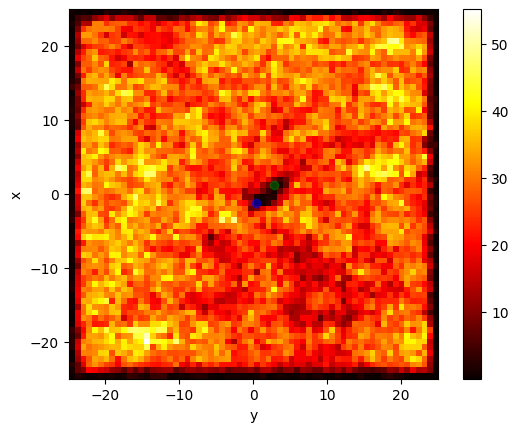

In [15]:
s = 50
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()
box = g.snaps[s][int(L/2/dx):int(3*L/2/dx), int(L/2/dx):int(3*L/2/dx)]
plt.figure() 
plt.imshow(np.abs(box)**2, cmap = plt.cm.hot, origin = 'lower', extent = [-L/2, L/2, -L/2, L/2])
plt.colorbar() 
plt.scatter(v1_traj[s][0]-L/2,v1_traj[s][1]-L/2, color = 'blue', alpha = 0.5)
plt.scatter(v2_traj[s][0]-L/2,v2_traj[s][1]-L/2, color = 'green', alpha = 0.5)

plt.xlabel('y')
plt.ylabel('x')

plt.show() 

NameError: name 'self' is not defined

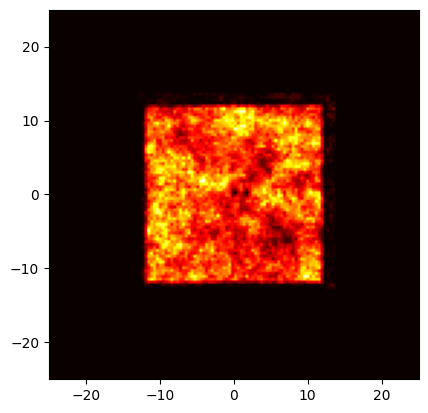

In [16]:
fig, ax = plt.subplots() 
data = plt.imshow(np.abs(g.snaps[0])**2, extent = [-g.L/2, g.L/2, -g.L/2, g.L/2],cmap = plt.cm.hot, origin = 'lower')

# set trajectories: 
v1_traj = tracker.points[0].getTrajectory()
v2_traj = tracker.points[1].getTrajectory()

v1 = plt.scatter(g.xi[0][0][int((self.vortex_positions[0][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][1]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '<', s = 20, alpha = 0.6)
v2 = plt.scatter(g.xi[0][0][int((self.vortex_positions[0][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][3]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '>', s = 20, alpha = 0.6)

In [ ]:
def animatepsi2d_vortex(self, filename, trajectories):
    if filename != None: 
        path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"

    fig, ax = plt.subplots() 
    data = plt.imshow(np.abs(self.snaps[0])**2, extent = [-self.winL/2, self.winL/2, -self.winL/2, self.winL/2],cmap = plt.cm.hot, origin = 'lower')

    if self.vortex: 
        v1 = plt.scatter(self.xi[0][0][int((self.vortex_positions[0][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][1]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '<', s = 20, alpha = 0.6)
        v2 = plt.scatter(self.xi[0][0][int((self.vortex_positions[0][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[0][3]+1)/self.dx+self.winL/4/self.dx)], color = 'blue', marker = '>', s = 20, alpha = 0.6)
    
    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    
    # plt.contour(self.xi[0], self.xi[1], self.Vs)
    
    plt.title(f'Animation for L={self.L}')
    fig.colorbar(data)

    def animate(i): 
        data.set_data(np.abs(self.snaps[i])**2)
        # fix these: 
        if self.vortex: 
            v1.set_offsets([self.xi[0][0][int((self.vortex_positions[i][0]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[i][1]+1)/self.dx+self.winL/4/self.dx)]])
            v2.set_offsets([self.xi[0][0][int((self.vortex_positions[i][2]+1)/self.dx+self.winL/4/self.dx)], self.xi[0][0][int((self.vortex_positions[i][3]+1)/self.dx+self.winL/4/self.dx)]])
        time_text.set_text('time = %.1d' % self.time_tracking[i])
        #return data, time_text
        return data, time_text, v1, v2
    anim = animation.FuncAnimation(fig, animate, frames = len(self.snaps), blit = True)

    plt.show() 
    
    anim.save(path)

    return anim

In [12]:
snap = 120
vortices, antivortices = pt.detectVortices(tracker, g.snaps[snap])
print(vortices)
print(antivortices)

IndexError: index 120 is out of bounds for axis 0 with size 9

[23.828125 26.953125]
[26.953125 26.953125]


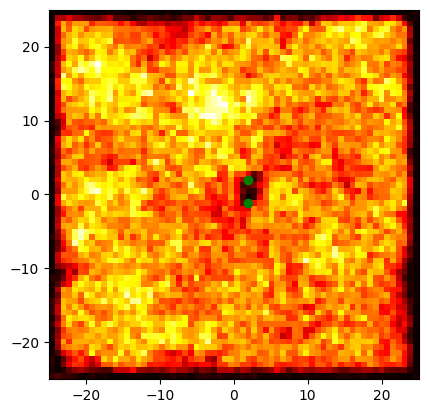

In [32]:
plt.figure() 
plt.imshow(np.abs(g.snaps[snap][int(g.L/2/g.dx):int(3*g.L/2/g.dx), int(g.L/2/g.dx):int(3*g.L/2/g.dx)])**2, cmap = plt.cm.hot, origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
for point in vortices: 
    plt.scatter(point[1]-L/2,point[0]-L/2, color = 'blue', alpha = 0.5)
for point in antivortices: 
    print(point) 
    plt.scatter(point[1]-L/2,point[0]-L/2, color = 'green')